In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_price_data.csv')
print(type)
df.head()

<class 'type'>


,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
df.shape

(1302, 13)

In [4]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [5]:
df['Unnamed: 0'].nunique()

1302

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [7]:
df.duplicated().sum()

30

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape

(1272, 12)

In [10]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [11]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')
Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


In [12]:
print(df.columns)
df.head()

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [13]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

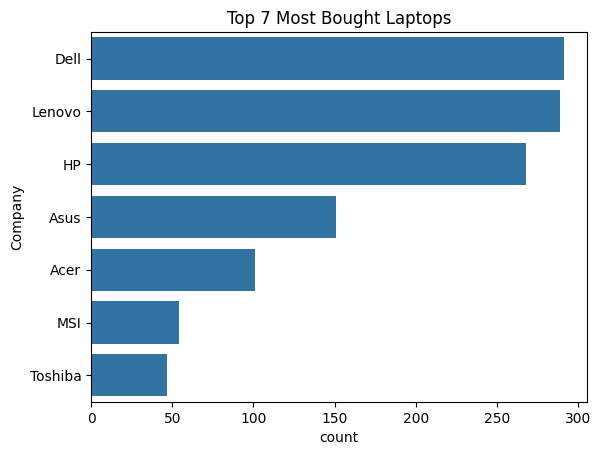

In [14]:
sns.countplot(y=df['Company'], order=df['Company'].value_counts()[:7].sort_values(ascending=False).index)
plt.title('Top 7 Most Bought Laptops')
plt.show()

In [15]:
df['TypeName'].value_counts()

TypeName
Notebook              705
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

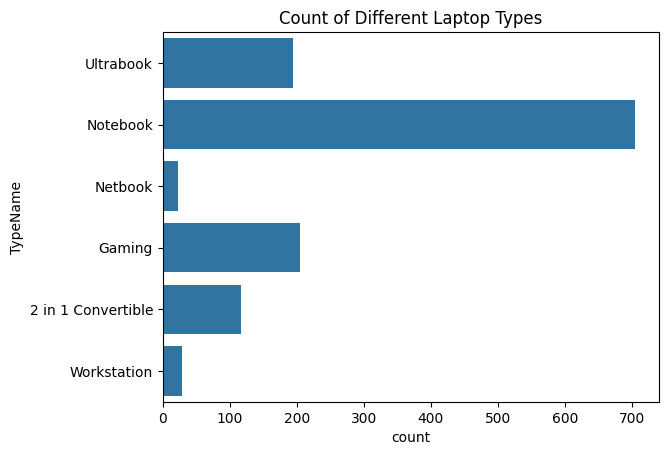

In [16]:
sns.countplot(y=df['TypeName'])
plt.title('Count of Different Laptop Types')
plt.show()

In [17]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

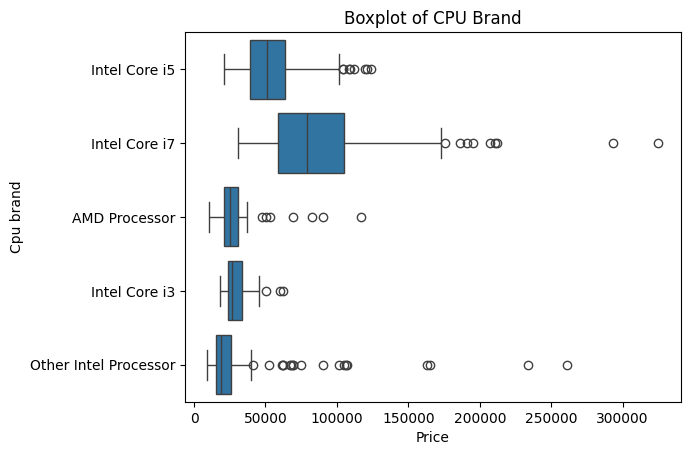

In [18]:
sns.boxplot(y=df['Cpu brand'],x=df['Price'])
plt.title('Boxplot of CPU Brand')
plt.show()

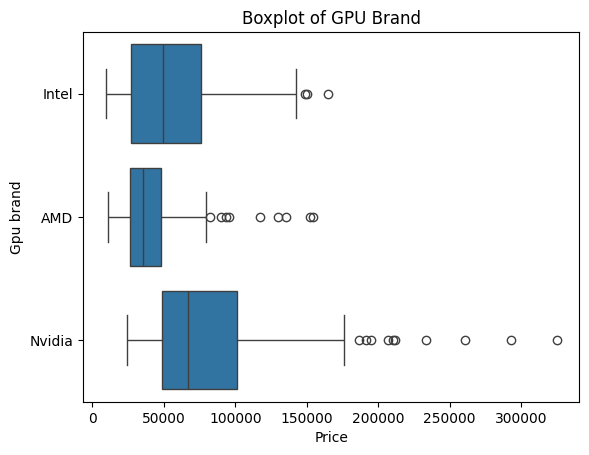

In [19]:
sns.boxplot(y=df['Gpu brand'],x=df['Price'])
plt.title('Boxplot of GPU Brand')
plt.show()

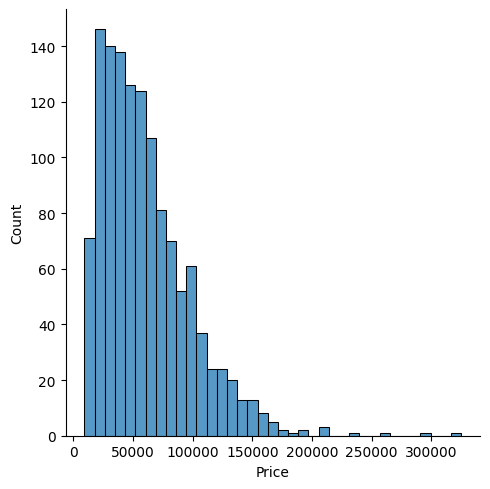

In [20]:
sns.displot(df['Price'])
plt.show()

In [27]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

ValueError: could not convert string to float: 'Apple'

In [ ]:
print(num_cols)

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


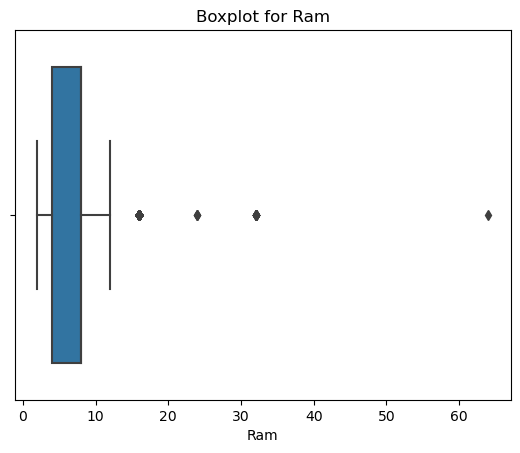

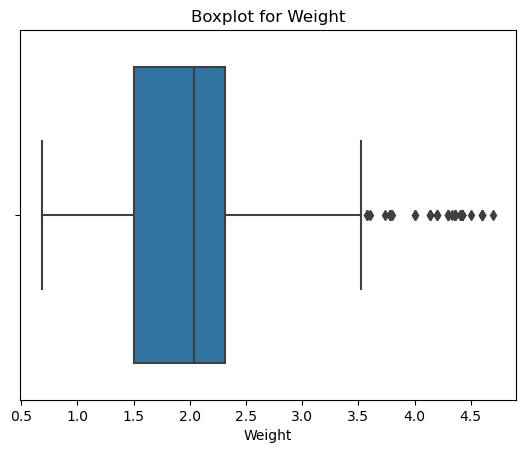

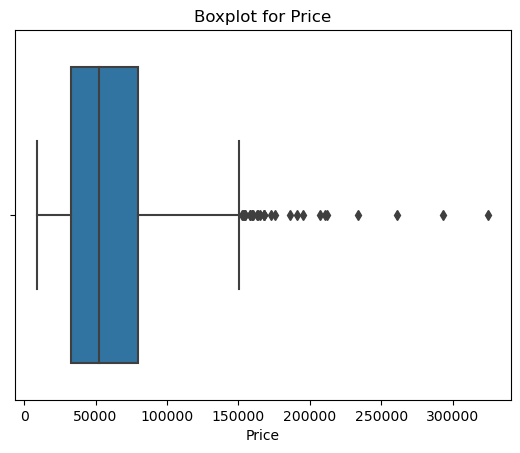

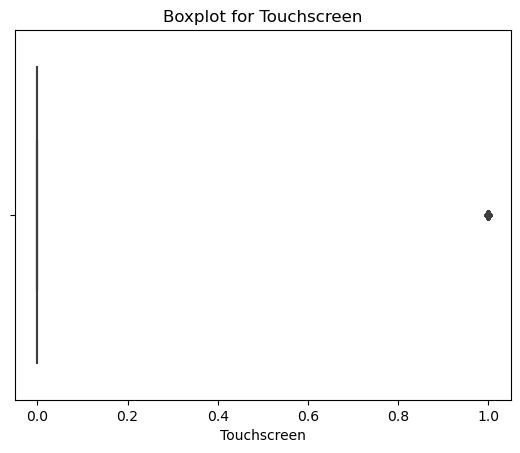

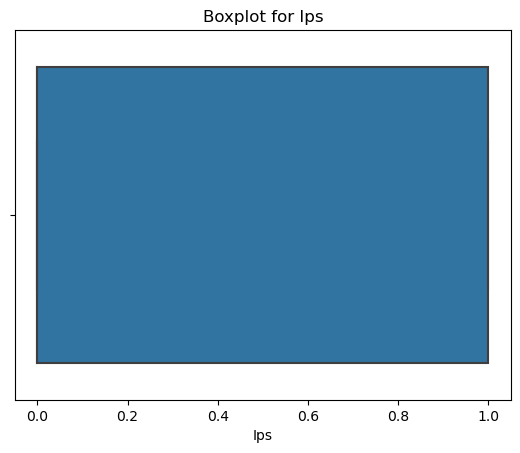

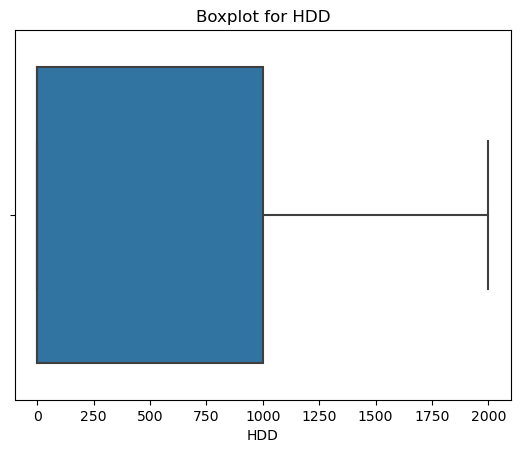

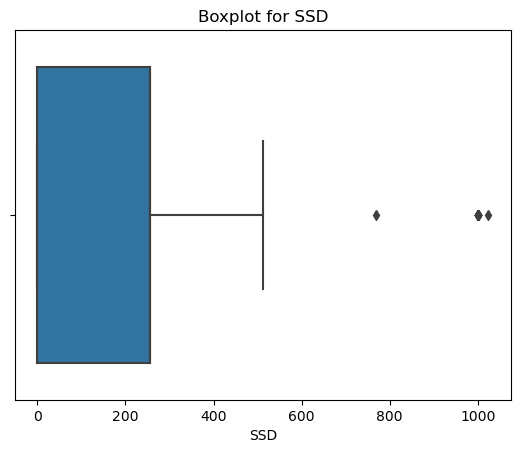

In [ ]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [ ]:
print(df[df['Weight']>3.5].shape)
print(df.shape)
print(46/1272)

(46, 12)
(1272, 12)
0.036163522012578615


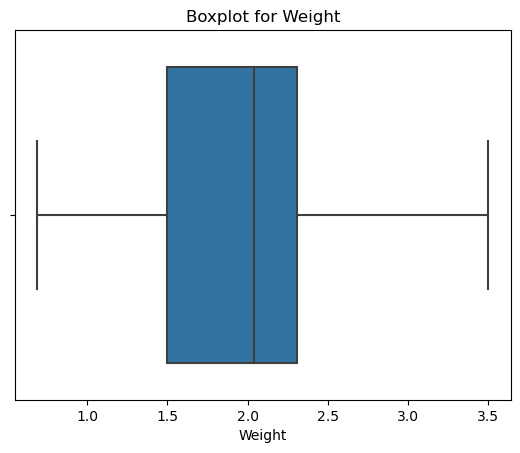

In [ ]:
df['Weight'] = np.where(df['Weight']>3.5,3.5,df['Weight'])
sns.boxplot(x=df['Weight'])
plt.title('Boxplot for Weight')
plt.show()

In [ ]:
df['Ram'].value_counts()

8     613
4     364
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

In [ ]:
#df[df['Price']>150000].head(30)

In [ ]:
#df['SSD'].value_counts()

In [ ]:
x = df.drop('Price',axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1272, 11)
(1272,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test, = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954, 11)
(318, 11)
(954,)
(318,)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
def eval_model(y_test,y_pred):
    mae= mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse= np.sqrt(mse)
    r2s = r2_score(y_test,y_pred)
    print("MAE",mae)
    print("MSE",mae)
    print("RMSE",mae)
    print("R2",r2s)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
step1 = ColumnTransformer(transformers=
                         [('encoder',OneHotEncoder(drop='first'),[0,1,6,9,10])],remainder='passthrough')
step2 = Ridge(alpha=4)

pipe_rid = Pipeline([('step1', step1),('step2', step2)])

pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 13739.057498827076
MSE 13739.057498827076
RMSE 13739.057498827076
R2 0.7098291557879857


In [ ]:
step1 = ColumnTransformer(transformers=
                         [('encoder',OneHotEncoder(drop='first'),[0,1,6,9,10])],remainder='passthrough')
step2 = Lasso(alpha=7)

pipe_rid = Pipeline([('step1', step1),('step2', step2)])

pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 13816.198359975691
MSE 13816.198359975691
RMSE 13816.198359975691
R2 0.7066444621628214


In [ ]:
step1 = ColumnTransformer(transformers=
                         [('encoder',OneHotEncoder(drop='first'),[0,1,6,9,10])],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=7)

pipe_rid = Pipeline([('step1', step1),('step2', step2)])

pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 13650.635430727763
MSE 13650.635430727763
RMSE 13650.635430727763
R2 0.6697551526586141


In [ ]:
step1 = ColumnTransformer(transformers=
                         [('encoder',OneHotEncoder(drop='first'),[0,1,6,9,10])],remainder='passthrough')
step2 = DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=15)

pipe_rid = Pipeline([('step1', step1),('step2', step2)])

pipe_rid.fit(x_train,y_train)
ypred_rid = pipe_rid.predict(x_test)
eval_model(y_test,ypred_rid)

MAE 11943.347423514673
MSE 11943.347423514673
RMSE 11943.347423514673
R2 0.7341726453312255


In [ ]:
step1 = ColumnTransformer(transformers=
                         [('encoder',OneHotEncoder(drop='first'),[0,1,6,9,10])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,criterion='squared_error')

pipe_rf = Pipeline([('step1', step1),('step2', step2)])

pipe_rf.fit(x_train,y_train)
ypred_rf = pipe_rf.predict(x_test)
eval_model(y_test,ypred_rf)

MAE 10097.711919464151
MSE 10097.711919464151
RMSE 10097.711919464151
R2 0.8275770155265934


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe_rf,open('rf.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))